# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/5. Dados/Alura/6. Curso - Classificação: aprendendo a classificar dados com Machine Learning/Base de dados/marketing_investimento.csv')

In [4]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca plotly. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

In [6]:
import plotly.express as px

In [7]:
# Gráfico da variável alvo
px.histogram(dados, x = 'aderencia_investimento', text_auto=True)

In [8]:
px.histogram(dados, x = 'estado_civil', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [9]:
px.histogram(dados, x = 'escolaridade', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [10]:
px.histogram(dados, x = 'inadimplencia', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

In [11]:
px.histogram(dados, x = 'fez_emprestimo', text_auto=True, color = 'aderencia_investimento', barmode = 'group')

Agora vamos explorar as variáveis numéricas utiliando o gráfico boxplot para entender a distribuição.

In [12]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [13]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [14]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [15]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

# Transformando os dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machile learning, precisamos fazer a separação da variável alvo e variável explicativas.

O y representa a variável que queremos prever, enquanto o x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [16]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [17]:
# Separando as variáveis explicativas da variável alvo, que é a "aderencia_investimento"
x = dados.drop('aderencia_investimento', axis = 1) # esse código retira a variável alvo da base de dados do x deixando apenas as explicativas.
y = dados ['aderencia_investimento'] # esse código insere a variável alvo no y.

In [18]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [19]:
y

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim
...,...
1263,sim
1264,sim
1265,sim
1266,sim


## Tratamentos das variáveis explicativas que estão em forma de texto

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto, devemos fazer transformações nos dados para o formato numérico para que o algritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto, não basta simplesmente alterar os valores para valores numéricos aleatórios.

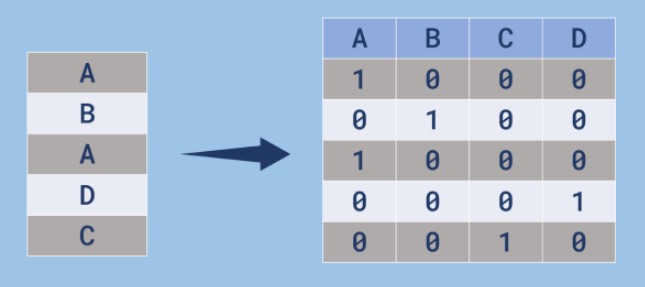

In [20]:
# Para fazer a transformação valor utilizar o algoritmo "one hot encoder"
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Armanezando o nome originais das colunas na variável "coluna", pois após a transformação os nomes serão alterados.
colunas = x.columns

In [22]:
# Aplicando:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [23]:
x = one_hot.fit_transform(x)

In [24]:
one_hot.get_feature_names_out(colunas) #Retorna o nome novo das colunas após o processo de transformação.

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [25]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 e 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()

In [28]:
y = label_encoder.fit_transform(y)

In [29]:
y

array([1, 1, 0, ..., 1, 1, 1])

# Ajustando modelos

## Divisão em treino e teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

## Modelo de Base

### Dummy

In [32]:
from sklearn.dummy import DummyClassifier

In [33]:
dummy = DummyClassifier()

In [34]:
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

## Modelo de Comparação

### Árvore de Decisão

O modeço de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
arvore = DecisionTreeClassifier(random_state = 5)

In [40]:
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [41]:
# Previsões de novos dados

arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [43]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [44]:
# Vendo as escolhas da árvore de decisão

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [45]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

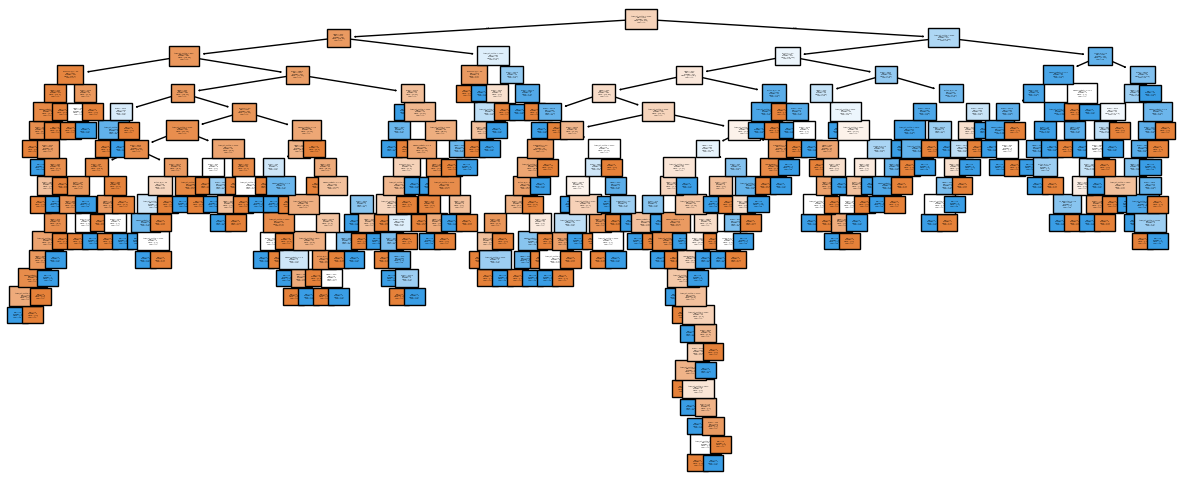

In [46]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['não', 'sim'], fontsize = 1, feature_names = nome_colunas);

In [47]:
arvore.score(x_treino, y_treino)

1.0

Com o score feito nos dados de treino, podemos verificar que houve um overfiting, ou seja, o modelo decorou os dados de treino (acerto de 100%), se ajustou perfeitamente, não sendo possível utilizá-lo no mundo real.

Para corrigir, vamos seguir os passos abaixo adicionando o max_depth = 3 ao classificador, para que ele não pegue todas as nuances dos dados de treino. Vamos fazer uma "poda" nas folhas da árvore:

In [48]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [49]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [50]:
arvore.score(x_teste, y_teste)

0.7160883280757098

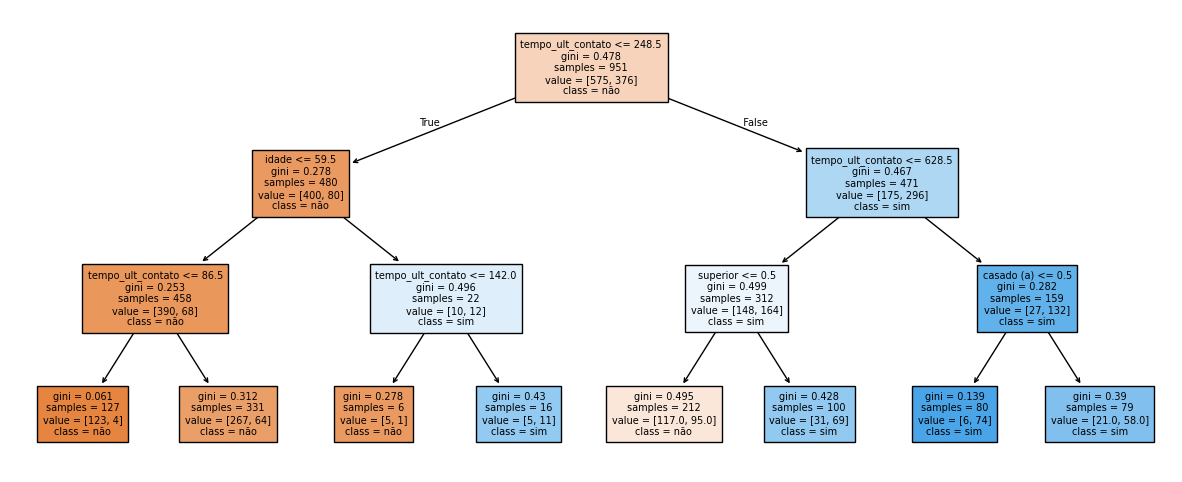

In [51]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['não', 'sim'], fontsize = 7, feature_names = nome_colunas);

## Utilizando o KNN

### Normalizando Dados

O algoritmo que utilizaremos é o KNN (K-Nearest Neighbors, em inglês). Este algoritmo, ao invés de tomar as decisões com base na comparação dos valores das colunas, como é na árvore de decisão, realizará um cálculo de distância entre os elementos da base de dados. Como exemplo, ele vai pegar o primeiro registro da base de dados, calcular a distância desse elemento para o segundo elemento da base de dados e assim por diante.

A intenção da normalização é deixar os dados em uma mesma escala, entre 0 e 1, para que os valores muito discrepantes não influenciem os cálculos de distância do algorítmo. A normalização garante que todas as características tenham o mesmo impacto no modelo, tornando as previsões mais justas e equilibradas.

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
normalizacao = MinMaxScaler()

In [54]:
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [55]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


### KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse altoritmo é influenciado pela escala de variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier() # por padrão ele avalia os 3 vizinhos mais próximos

In [59]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [60]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [61]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

# Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.

Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

## Comparando os modelos

In [62]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


## Salvando o modelo escolhido

In [63]:
import pickle

In [65]:
# Salvando o modelo One Hot Encoder, que fizemos lá em cima, em um arquivo:
with open ('modelo_ondehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [66]:
# Salvando o modelo de árvore escolhido:
with open ('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

## Exemplo de como aplicado os modelos salvos em novos dados do banco de dados

In [67]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [68]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [69]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [70]:
modelo_one_hot = pd.read_pickle('/content/modelo_ondehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [71]:
# Tratamento das variáveis categóricas:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])

O resultado de array "1" significa que o novo cliente inserido vai aderir ao investimento no banco.